<a href="https://colab.research.google.com/github/alexandergribenchenko/estudio/blob/main/Classification_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Función que nos permite definir la relación de color con base en el minimo 
# y el maximo de un conjunto de datos y una paleta de color elegida
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/Test_ifood/ml_project1_data.csv'

In [6]:
df = pd.read_csv(path, sep=',')

In [7]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df['Age']=df.Year_Birth.apply(lambda x: 2021-x)

In [10]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,54
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,75
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,40
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,65


In [11]:
# Generamos los intervalos y las categorias en los que queremos etiquetar las mediciones
bins = pd.IntervalIndex.from_tuples([(0, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 55),(55, 60),(60, 65),(65, 70), (70, 75),(75, 140)], closed='left')
categorias = [' < 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55', '55 - 60', '60 - 65', '65 - 70', '70 - 75', '75 >']
print(bins)
print(categorias)

IntervalIndex([[0, 30), [30, 35), [35, 40), [40, 45), [45, 50) ... [55, 60), [60, 65), [65, 70), [70, 75), [75, 140)],
              closed='left',
              dtype='interval[int64]')
[' < 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55', '55 - 60', '60 - 65', '65 - 70', '70 - 75', '75 >']


In [12]:
# Se muestra a manera de ejemplo como se haría la etiqueta de una columna en especifico
pd.Series(np.array(categorias)[pd.cut(df["Age"], bins = bins).cat.codes], index=df.index)

0       60 - 65
1       65 - 70
2       55 - 60
3       35 - 40
4       40 - 45
         ...   
2235    50 - 55
2236       75 >
2237    40 - 45
2238    65 - 70
2239    65 - 70
Length: 2240, dtype: object

In [13]:
df['Age_range']=pd.Series(np.array(categorias)[pd.cut(df["Age"], bins = bins).cat.codes], index=df.index)

In [14]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_range
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,60 - 65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,65 - 70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,55 - 60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,35 - 40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,40 - 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,54,50 - 55
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,75,75 >
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,40,40 - 45
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,65,65 - 70


In [15]:
df_analisis=df.groupby([df.Age_range])['ID'].count().to_frame().reset_index()
df_analisis

,Age_range,ID
0,< 30,28
1,30 - 35,119
2,35 - 40,199
3,40 - 45,260
4,45 - 50,394
5,50 - 55,330
6,55 - 60,255
7,60 - 65,232
8,65 - 70,241
9,70 - 75,139


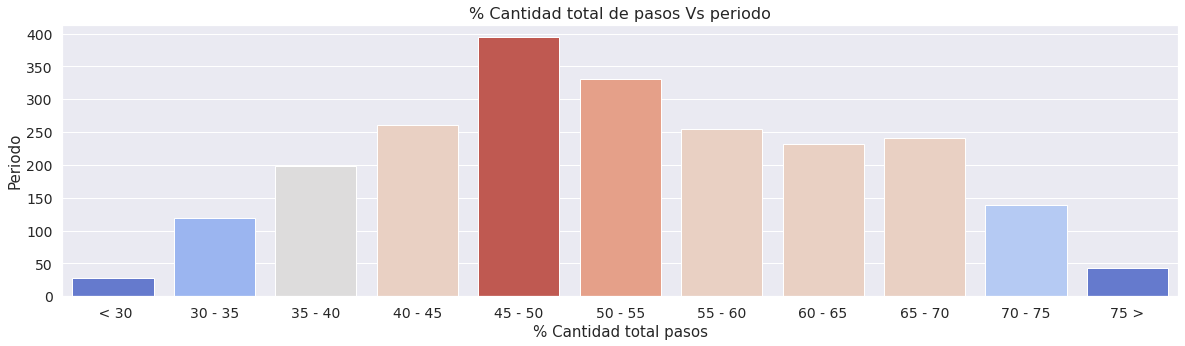

In [16]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Age_range", 
            y="ID", 
            data=df_analisis,
            palette=colors_from_values(df_analisis['ID'], "coolwarm"))
#Formato de la gráfica
plt.title('% Cantidad total de pasos Vs periodo',fontsize=16)
plt.xlabel('% Cantidad total pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [17]:
dataset_analisis=df.groupby([df.Age_range, df.Education])['ID'].count().to_frame().reset_index()
dataset_analisis

,Age_range,Education,ID
0,< 30,2n Cycle,4
1,< 30,Basic,5
2,< 30,Graduation,17
3,< 30,Master,2
4,30 - 35,2n Cycle,16
5,30 - 35,Basic,8
6,30 - 35,Graduation,68
7,30 - 35,Master,12
8,30 - 35,PhD,15
9,35 - 40,2n Cycle,22


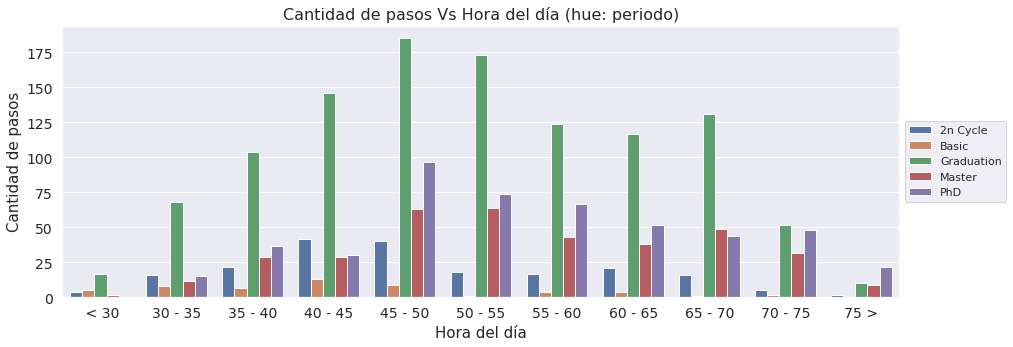

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Age_range", 
            y="ID", 
            hue='Education',
            data=dataset_analisis,
            #data=dataset_analisis[dataset_analisis.Education=='2n Cycle'],
            #palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
#Formato de la gráfica
plt.title('Cantidad de pasos Vs Hora del día (hue: periodo)',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [19]:
df[df.Education=='2n Cycle'].groupby([df.Age])['ID'].count().to_frame().reset_index()

,Age,ID
0,25,1
1,26,2
2,29,1
3,30,2
4,31,2
5,32,4
6,33,6
7,34,2
8,35,4
9,36,5


In [20]:
df['Edu_encode']= df.Education.copy()

In [21]:
df.Edu_encode.replace({'Basic': 0, 'Graduation': 1, '2n Cycle': 2, 'Master': 3, 'PhD': 4}, inplace=True)

In [22]:
dataset_analisis=df.groupby([df.Age_range, df.Edu_encode])['ID'].count().to_frame().reset_index()
dataset_analisis

,Age_range,Edu_encode,ID
0,< 30,0,5
1,< 30,1,17
2,< 30,2,4
3,< 30,3,2
4,30 - 35,0,8
5,30 - 35,1,68
6,30 - 35,2,16
7,30 - 35,3,12
8,30 - 35,4,15
9,35 - 40,0,7


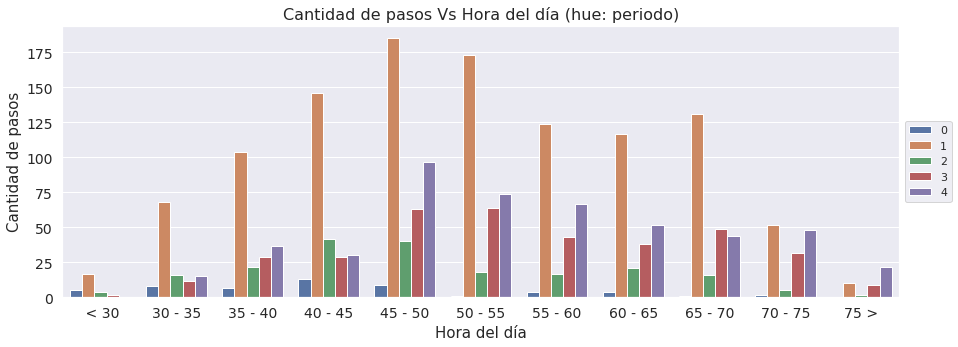

In [23]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Age_range", 
            y="ID", 
            hue='Edu_encode',
            data=dataset_analisis,
            #data=dataset_analisis[dataset_analisis.Education=='2n Cycle'],
            #palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
#Formato de la gráfica
plt.title('Cantidad de pasos Vs Hora del día (hue: periodo)',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [24]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_range,Edu_encode
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,60 - 65,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,65 - 70,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,55 - 60,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,35 - 40,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,40 - 45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,54,50 - 55,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,75,75 >,4
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,40,40 - 45,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,65,65 - 70,3


In [ ]:
# Función que me permite escalar empleando el StandarScaler
# Entradas: df (dataframe que quiero escalar, col (lista con las columnas que deseo escalar))
# Salida: dataframe escalado en las columnas que se pidio (mantiene indices de filas y columnas)
def get_scaler_standar(df,columns):
    df_scaled=df.copy()
    std_scaler = StandardScaler()
    array_scaled=std_scaler.fit_transform(df[columns])
    df_scaled_columns = pd.DataFrame(data=array_scaled, columns=df[columns].columns, index=df[columns].index)
    df_scaled[columns]=df_scaled_columns
    return df_scaled

In [ ]:
get_scaler_standar(df,columns)

In [ ]:
len(df.ID.unique())

2240

In [ ]:
df_analisis=df.groupby([df.Age])['ID'].count().to_frame().reset_index()
df_analisis

,Age,ID
0,25,2
1,26,5
2,27,3
3,28,5
4,29,13
5,30,15
6,31,18
7,32,30
8,33,29
9,34,27


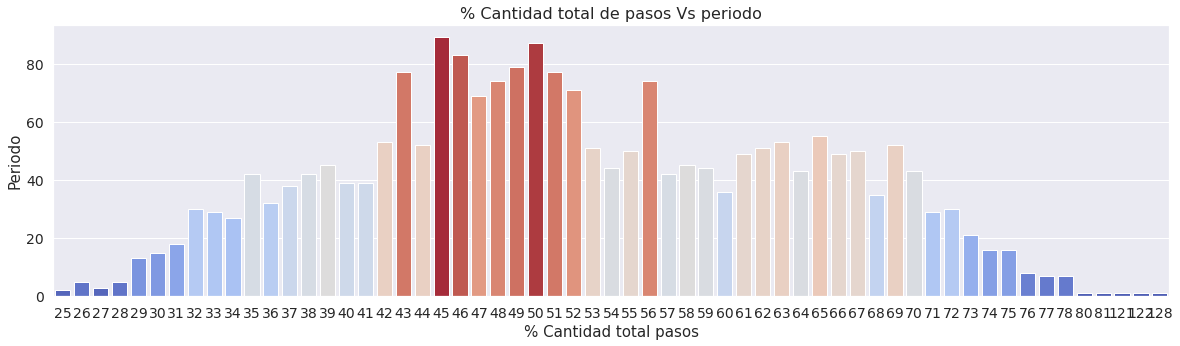

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Age", 
            y="ID",
            hue=
            data=df_analisis,
            palette=colors_from_values(df_analisis['ID'], "coolwarm"))
#Formato de la gráfica
plt.title('% Cantidad total de pasos Vs periodo',fontsize=16)
plt.xlabel('% Cantidad total pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
df_analisis=df.groupby([df.Education])['ID'].count().to_frame().reset_index()
df_analisis

,Education,ID
0,2n Cycle,203
1,Basic,54
2,Graduation,1127
3,Master,370
4,PhD,486


In [ ]:
df_analisis.Education.unique()

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Edu_encode
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,54,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,75,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,40,3
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,65,4


In [ ]:
print(df.columns)
len(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Edu_encode'],
      dtype='object')


31

In [ ]:
cols_add = ['Age', 'Edu_encode']

cols_cost_info = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Dt_Customer']

cols_Mnt = ['MntFishProducts','MntFruits', 'MntMeatProducts', 'MntSweetProducts','MntWines','MntGoldProds']

cols_Num = ['NumCatalogPurchases','NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases',  'NumWebVisitsMonth']

cols_Acc = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

cols_Others = ['Recency', 'Complain', 'Z_CostContact', 'Z_Revenue']
col_Target = ['Response']

In [ ]:
df[col_Target].value_counts()

Response
0           1906
1            334
dtype: int64

In [ ]:
df[cols_Others]

,Recency,Complain,Z_CostContact,Z_Revenue
0,58,0,3,11
1,38,0,3,11
2,26,0,3,11
3,26,0,3,11
4,94,0,3,11
...,...,...,...,...
2235,46,0,3,11
2236,56,0,3,11
2237,91,0,3,11
2238,8,0,3,11


In [ ]:
df.Z_CostContact.value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [ ]:
df.Z_Revenue.value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [ ]:
df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Hacemos la conversión de la columna fecha a tipo datetime
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64